# Diamond Price Prediction


In [35]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

sns.set_style("whitegrid")

# loading the dataset
df = pd.read_csv('diamonds.csv')

# removing index column
df = df.drop(df.columns[0], axis=1)

# moving price column to last
df['price'] = df.pop('price')

# Data analysis

## Dataset description
|Column Name|Description|
|-----------|-----------|
|carat|Weight of the diamond|
|cut|Quality of the cut (Fair, Good, Very Good, Premium, Ideal)|
|color|Diamond colour, from J (worst) to D (best)|
|clarity|How clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|x|Length in mm|
|y|Width in mm|
|z|Depth in mm|
|depth|Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)|
|table|Width of top of diamond relative to widest point (43--95)|
|price (target)|Price in US dollars (326--18,823)|

In [36]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [37]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757
53939,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,2757


# Data Preprocessing

In [38]:
df.shape

(53940, 10)

In [39]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [40]:
#checking descriptive statistics
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


Above we can see that minimum value of x, y and z is 0 which is not possible because diamond can't be dimentionless. So we have to remove that values

In [41]:
df = df.drop(df[(df["x"]==0) | (df["y"]==0) | (df["z"]==0)].index)

print(df.shape)
df.describe()

(53920, 10)


,carat,depth,table,x,y,z,price
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,5.731627,5.734887,3.540046,3930.993231
std,0.473795,1.432331,2.234064,1.119423,1.140126,0.702530,3987.280446
min,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,949.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5323.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [42]:
# values count of categorical variables
print(df.cut.value_counts(),'\n\n',df.color.value_counts(),'\n\n',df.clarity.value_counts())

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64 

 color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64 

 clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64


# Exploratory Data Analysis

Text(0.5, 1.0, 'Price count')

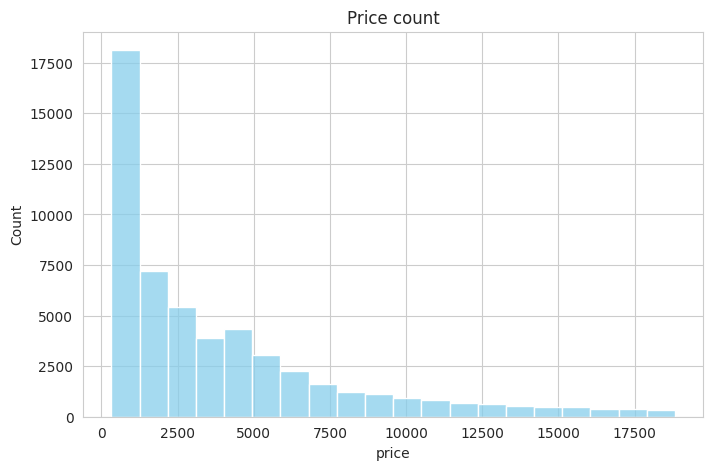

In [43]:
# Plot
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, color='skyblue')
plt.title("Price count")

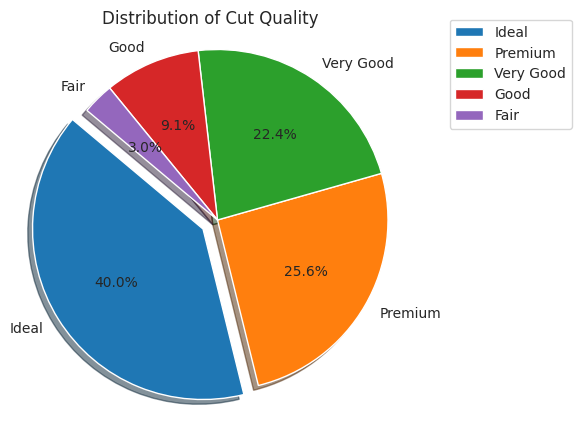

In [44]:
# Data
labels = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
sizes = df['cut'].value_counts()
explode = (0.1, 0, 0, 0, 0)

# Plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Distribution of Cut Quality')
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

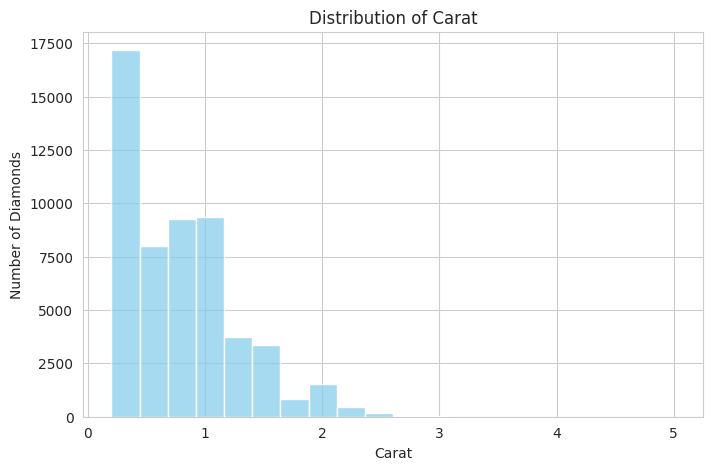

In [45]:
# Plot
plt.figure(figsize=(8, 5))
sns.histplot(df['carat'], bins=20, color='skyblue')
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Number of Diamonds')
plt.show()

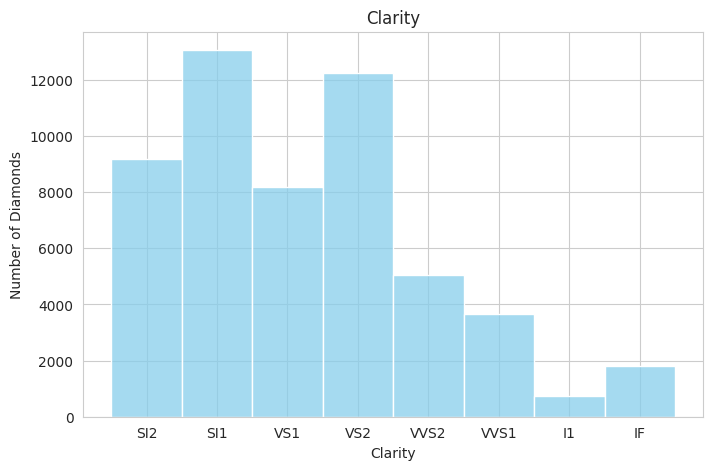

In [46]:
plt.figure(figsize=(8, 5))

sns.histplot(df['clarity'], bins=20, color='skyblue')
plt.title('Clarity')
plt.ylabel("Number of Diamonds")
plt.xlabel("Clarity")
plt.show()

# Comparing Diamond's features with Price

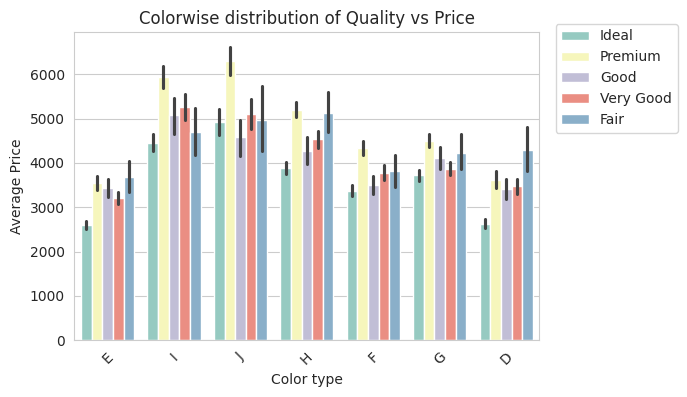

In [47]:
# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='color', y='price', hue='cut', data=df, palette="Set3")  # Using a blue color palette
plt.title('Colorwise distribution of Quality vs Price')
plt.xlabel('Color type')
plt.ylabel('Average Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1.05))
plt.show()

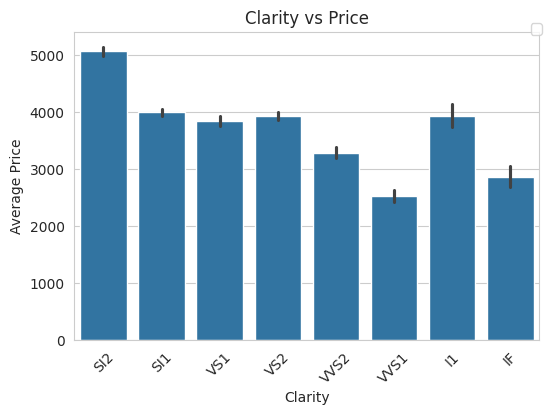

In [48]:
# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='clarity', y='price', data=df)  # Using a blue color palette

plt.title('Clarity vs Price')
plt.xlabel('Clarity')
plt.ylabel('Average Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1.05))
plt.show()


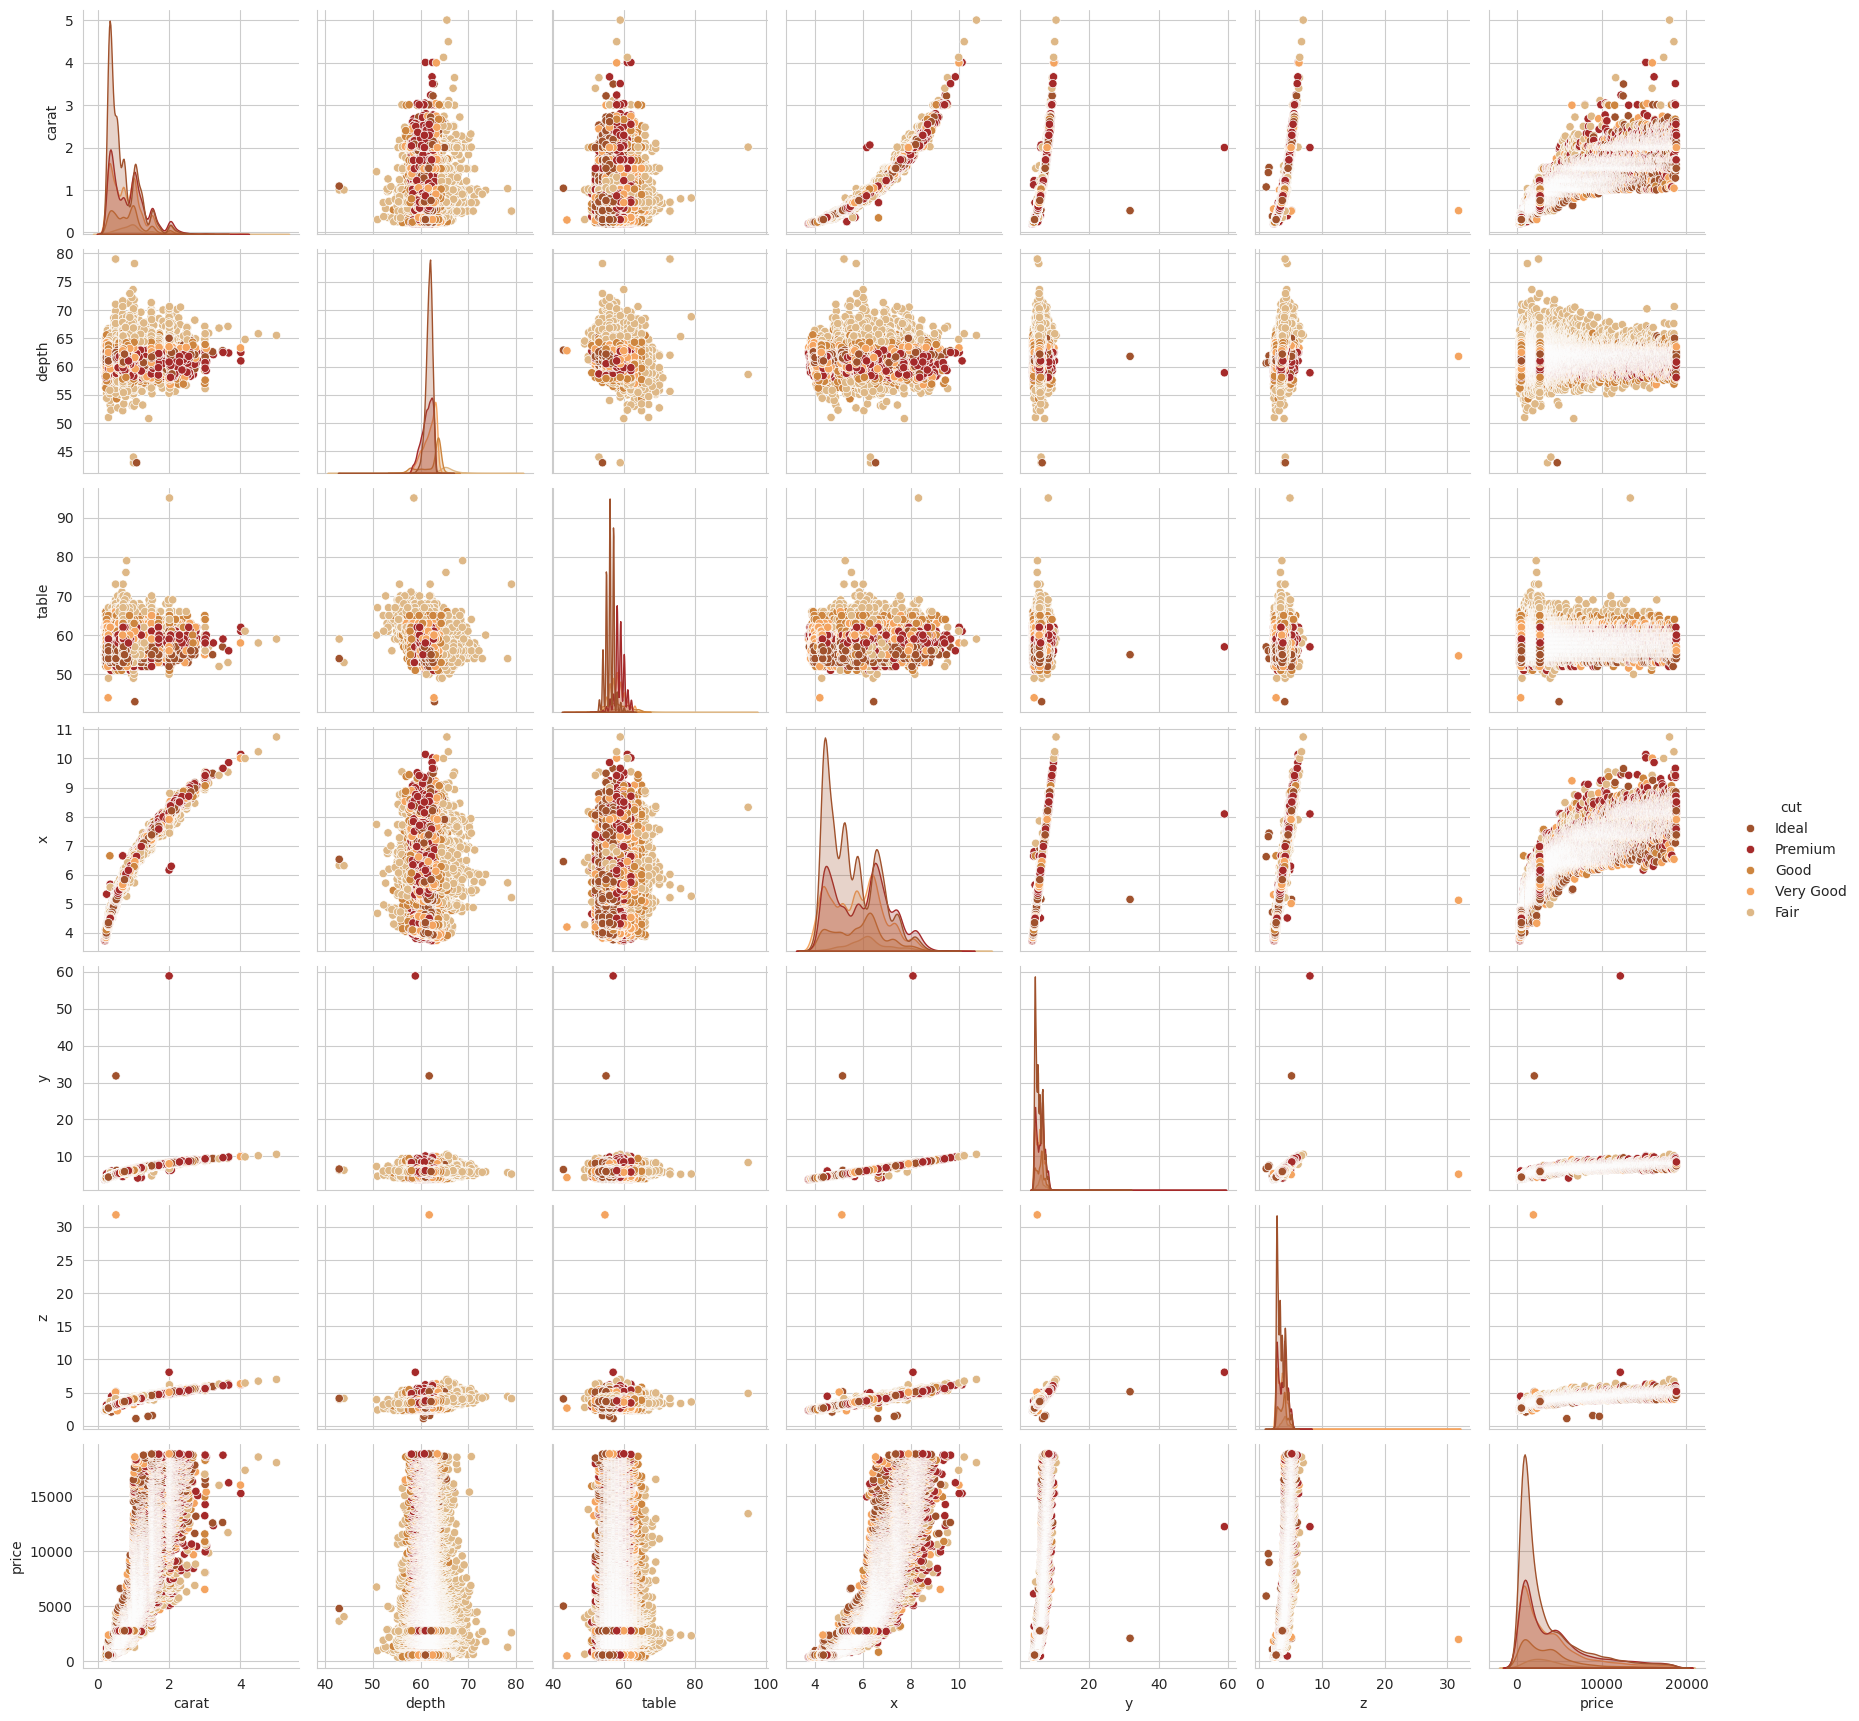

In [49]:
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
sns.pairplot(df, hue= "cut", palette = cols)
plt.show()

# Encoding string datatype columns

In [50]:
#changing categorical variables to numerical variables
df['cut'] = df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df['color'] = df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['clarity'] = df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [51]:
#coorelation matrix
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.134953,-0.291360,-0.352757,0.028259,0.181646,0.977779,0.953991,0.961048,0.921592
cut,-0.134953,1.000000,0.020517,0.189153,-0.218073,-0.433306,-0.126232,-0.122181,-0.150647,-0.053491
color,-0.291360,0.020517,1.000000,-0.025783,-0.047373,-0.026481,-0.270671,-0.263915,-0.270011,-0.172431
clarity,-0.352757,0.189153,-0.025783,1.000000,-0.067457,-0.160256,-0.372865,-0.359015,-0.370250,-0.146789
depth,0.028259,-0.218073,-0.047373,-0.067457,1.000000,-0.295733,-0.025017,-0.029069,0.095023,-0.010729
table,0.181646,-0.433306,-0.026481,-0.160256,-0.295733,1.000000,0.196097,0.184493,0.152483,0.127245
x,0.977779,-0.126232,-0.270671,-0.372865,-0.025017,0.196097,1.000000,0.974918,0.975435,0.887231
y,0.953991,-0.122181,-0.263915,-0.359015,-0.029069,0.184493,0.974918,1.000000,0.956744,0.867864
z,0.961048,-0.150647,-0.270011,-0.370250,0.095023,0.152483,0.975435,0.956744,1.000000,0.868206
price,0.921592,-0.053491,-0.172431,-0.146789,-0.010729,0.127245,0.887231,0.867864,0.868206,1.000000


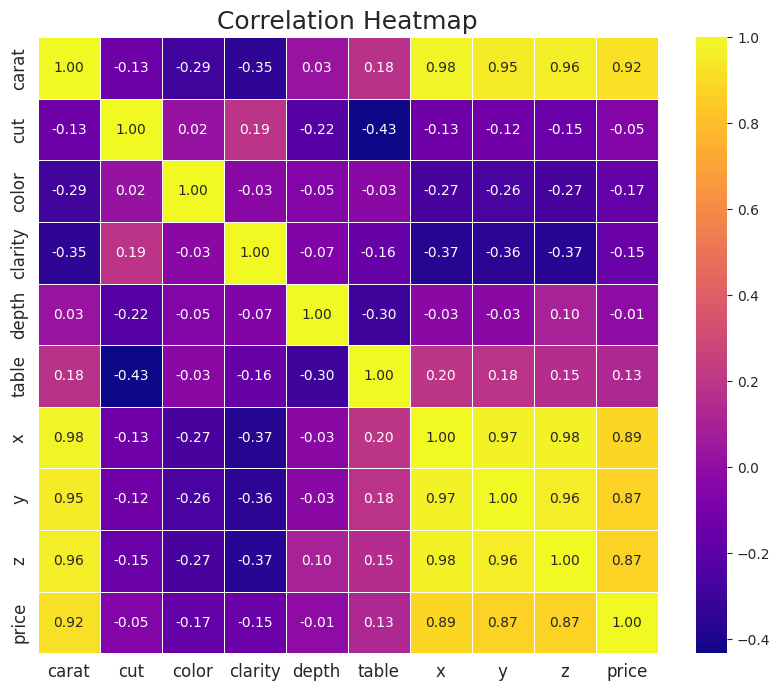

In [52]:
# Plot
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='plasma', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Ploting the relationship between Price and Carat

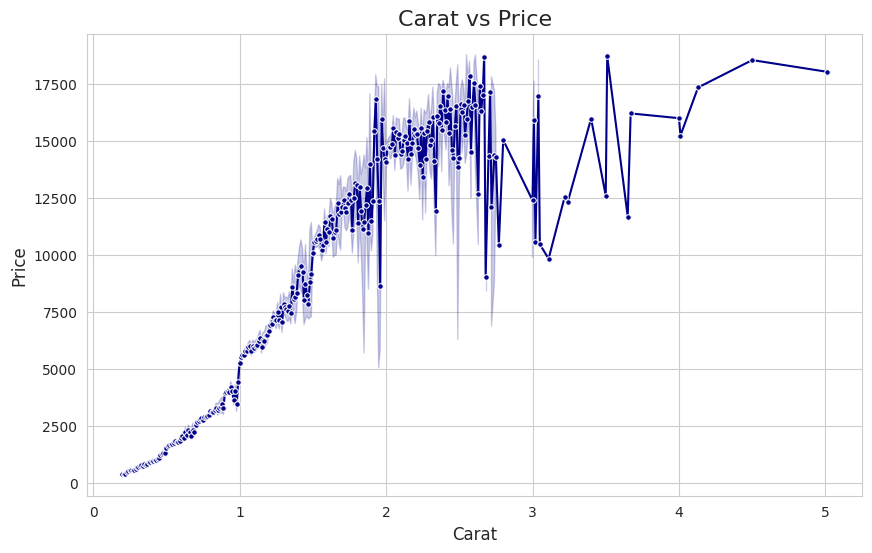

In [53]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='carat', y='price', data=df, color='darkblue', marker='o', markersize=4, linestyle='-')
plt.title('Carat vs Price', fontsize=16)
plt.xlabel('Carat', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()


# Train Test Split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('price',axis=1),df['price'],test_size=0.2,random_state=42)

print(x_test)

       carat  cut  color  clarity  depth  table     x     y     z
34704   0.31    4      5        8   60.8   59.0  4.36  4.39  2.66
21099   1.29    5      3        5   61.8   56.0  6.97  7.02  4.32
23685   1.52    4      5        3   62.6   59.0  7.36  7.27  4.58
39200   0.41    2      5        6   63.6   56.0  4.72  4.68  2.99
35560   0.35    4      4        5   61.5   58.0  4.54  4.50  2.78
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
6432    1.02    5      7        2   62.5   57.0  6.43  6.38  4.00
14694   1.00    3      3        6   60.3   59.0  6.41  6.46  3.88
20508   1.70    4      2        5   61.5   58.0  7.74  7.64  4.73
49621   0.32    3      5        2   63.1   56.0  4.38  4.34  2.75
45357   0.67    2      7        2   64.7   55.0  5.50  5.54  3.57

[10784 rows x 9 columns]


## PCA analysis

In [56]:
# function for scaling the values
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# function for applying PCA
pca_model = PCA(n_components=.90)
pca_model.fit(x_train)


x_train_pca = pca_model.transform(x_train_scaled)
print(x_train_pca.shape)
x_test_pca = pca_model.transform(x_test_scaled)

(43136, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


#Model Building

 ## Decision Tree Regressor

In [57]:
dt = DecisionTreeRegressor(random_state=42)

#training
dt.fit(x_train,y_train)

# train accuracy
print(f"Training accuracy: {dt.score(x_train,y_train)}")

# test accuracy
print(f"Testing accuracy: {dt.score(x_test, y_test)}")

Training accuracy: 0.9999952121242284
Testing accuracy: 0.9680682322952282


In [58]:
dt_pca = DecisionTreeRegressor(random_state=42)

dt_pca.fit(x_train_pca, y_train)

# train accuracy
print(f"Training accuracy: {dt_pca.score(x_train_pca, y_train)}")

# test accuracy
print(f"Testing accuracy: {dt_pca.score(x_test_pca, y_test)}")

Training accuracy: 0.9999952121242284
Testing accuracy: 0.9513445427447342


## Random Forest Regressor

In [59]:
rf = RandomForestRegressor(random_state=42)
#training the model
rf.fit(x_train,y_train)

#train accuracy
print(f"Training accuracy: {rf.score(x_train,y_train)}")

# test_ accuracy
print(f"Testing accuracy: {rf.score(x_test, y_test)}")

Training accuracy: 0.9973643239644241
Testing accuracy: 0.9835357980641132


In [60]:
rf_pca = RandomForestRegressor(random_state=42)

#training the model
rf_pca.fit(x_train_pca, y_train)

#train accuracy
print(f"Training accuracy: {rf_pca.score(x_train_pca,y_train)}")

# test_ accuracy
print(f"Testing accuracy: {rf_pca.score(x_test_pca, y_test)}")

Training accuracy: 0.9964528179076472
Testing accuracy: 0.9756577547265708


## Linear Regression

In [61]:
regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Training accuracy: {regr.score(x_train, y_train)}")

print(f"Testing accuracy: {regr.score(x_test, y_test)}")

Training accuracy: 0.9051738899589438
Testing accuracy: 0.9099711072980505


In [62]:
regr_pca = LinearRegression()

regr_pca.fit(x_train_pca, y_train)

print(f"Training accuracy: {regr_pca.score(x_train_pca, y_train)}")

print(f"Testing accuracy: {regr_pca.score(x_test_pca, y_test)}")

Training accuracy: 0.8464165403129833
Testing accuracy: 0.8425320010951025


# Model Evaluation

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

## 1. Decision Tree Regressor

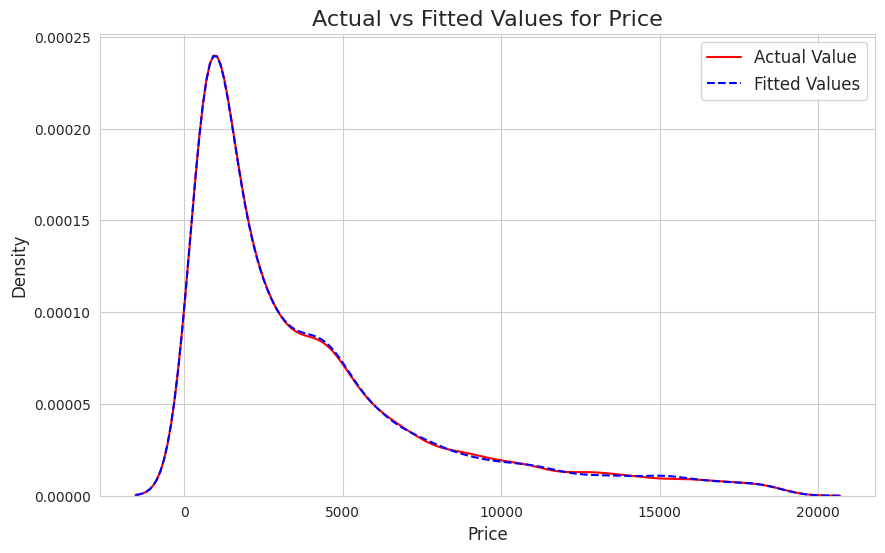

In [64]:
# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='r', label='Actual Value', linestyle='-')
dt_pred=dt.predict(x_test)
sns.kdeplot(dt_pred, color='b', label='Fitted Values', linestyle='--')

# Additional customizations
plt.title('Actual vs Fitted Values for Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)

# Show plot
plt.show()

In [65]:
print('Decision Tree Regressor RMSE:',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor Accuracy:',dt.score(x_test,y_test))
print('Decision Tree Regressor MAE:',mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor RMSE: 715.4918105229752
Decision Tree Regressor Accuracy: 0.9680682322952282
Decision Tree Regressor MAE: 351.61396513353117


## 2. Random Forest Regressor

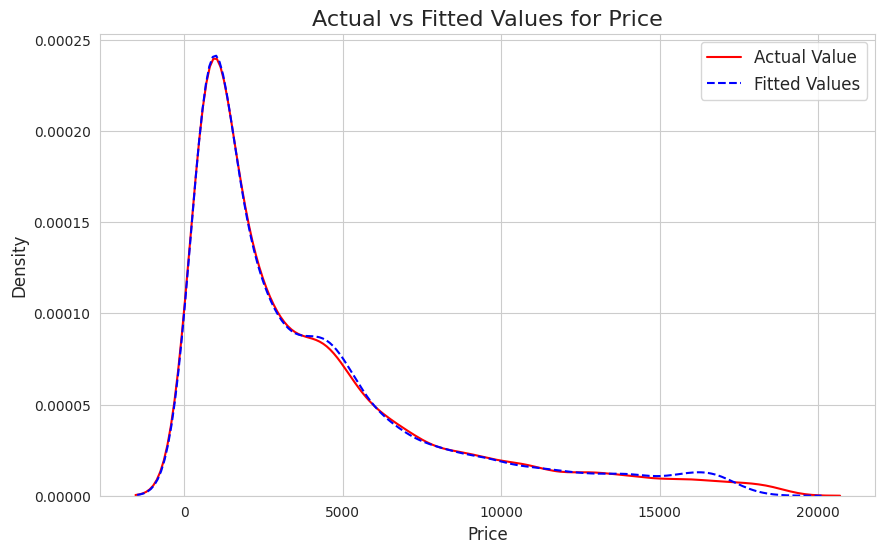

In [66]:
# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='r', label='Actual Value', linestyle='-')
rf_pred=rf.predict(x_test)
sns.kdeplot(rf_pred, color='b', label='Fitted Values', linestyle='--')

# Additional customizations
plt.title('Actual vs Fitted Values for Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)

# Show plot
plt.show()

In [67]:
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor RMSE: 513.7638333839099
Random Forest Regressor Accuracy: 0.9835357980641132
Random Forest Regressor MAE: 259.1155486445969




```
# This is formatted as code
```

## 3. Linear Regressior

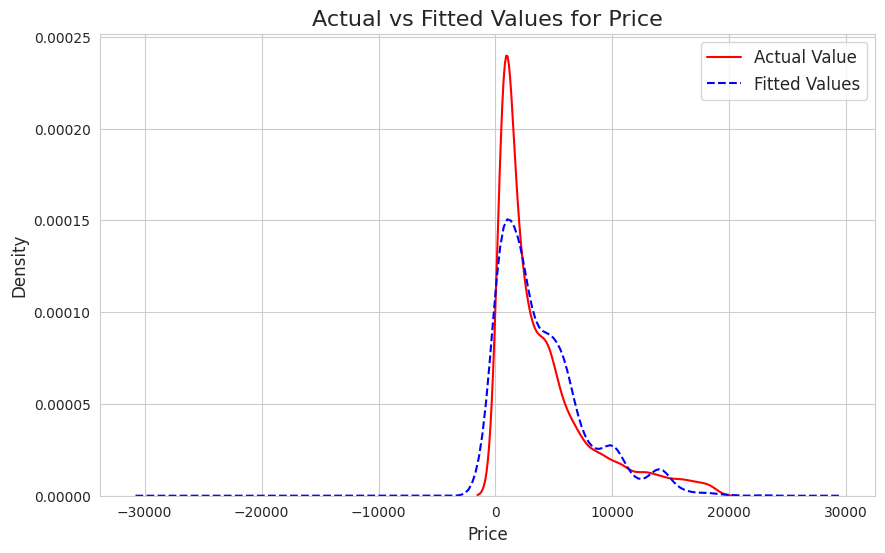

In [68]:
# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='r', label='Actual Value', linestyle='-')
regr_pred=regr.predict(x_test)
sns.kdeplot(regr_pred, color='b', label='Fitted Values', linestyle='--')

# Additional customizations
plt.title('Actual vs Fitted Values for Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)

# Show plot
plt.show()

In [69]:
print('Linear Regressor RMSE:',np.sqrt(mean_squared_error(y_test,regr_pred)))
print('Linear Regressor Accuracy:',regr.score(x_test,y_test))
print('Linear Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Linear Regressor RMSE: 1201.390354701103
Linear Regressor Accuracy: 0.9099711072980505
Linear Regressor MAE: 259.1155486445969


# Conclusion

After evaluating multiple models, including Decision Tree, Random Forest, and Linear Regression, it was found that Random Forest outperformed the others, with Decision Tree showing similar performance. PCA simplified the model by reducing features to 5 while maintaining performance for Decision Tree and Random Forest, but did not improve Linear Regression. Random Forest achieved a lower RMSE of 513.76 compared to 715.49 for Decision Tree, while Linear Regression exhibited a higher RMSE of 1201.39 despite a respectable R-squared value of 0.910. These findings indicate that ensemble methods like Random Forest are better suited for diamond price prediction, offering more accurate results than traditional linear models.